In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
df=pd.read_csv('breast-cancer.csv')

In [110]:
df.shape

(569, 32)

In [111]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [112]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['diagnosis']=l.fit_transform(df.diagnosis)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [114]:
df.drop(['id'],axis=1,inplace=True)

In [115]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [116]:
x=df.drop(['diagnosis'],1)
y=df['diagnosis']

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [118]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)


Logistic

In [119]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [120]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(x_train)) * 100

0.9627882599580713


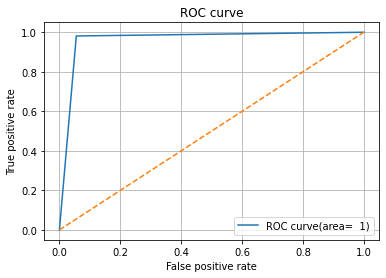

In [121]:
auc_score1 = roc_auc_score(y_test, lr_clf.predict(x_test))
print(auc_score1)
fpr,tpr,_=roc_curve(y_test,lr_clf.predict(x_test))
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [122]:
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score,train_score-test_score,auc_score1,confusion_matrix(y_test,lr_clf.predict(x_test))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Deviation','AUC','CM'])
results_df

,Model,Training Accuracy %,Testing Accuracy %,Deviation,AUC,CM
0,Logistic Regression,96.00939,95.804196,0.205194,0.962788,"[[85, 5], [1, 52]]"


SVM


In [123]:
svm_clf = SVC(kernel='linear',max_iter=1000, C=10)
svm_clf.fit(x_train, y_train)

C:\Users\cheta\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=10, kernel='linear', max_iter=1000)

In [124]:
test_score = accuracy_score(y_test, svm_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(x_train)) * 100

0.9333333333333333


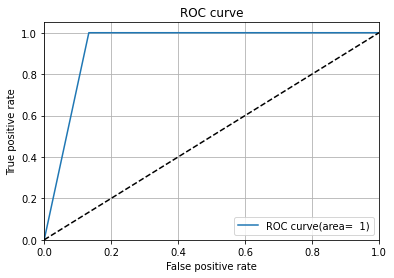

In [125]:
auc_score2 = roc_auc_score(y_test, svm_clf.predict(x_test))
print(auc_score2)
fpr,tpr,_=roc_curve(y_test,svm_clf.predict(x_test))
#calculate AUC
roc_auc=auc(fpr,tpr)

#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [126]:
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score,train_score-test_score,auc_score2,confusion_matrix(y_test,svm_clf.predict(x_test))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Deviation','AUC','CM'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Deviation,AUC,CM
0,Logistic Regression,96.009390,95.804196,0.205194,0.962788,"[[85, 5], [1, 52]]"
1,Support Vector Machine,91.784038,91.608392,0.175646,0.933333,"[[78, 12], [0, 53]]"


Decision Tree

In [127]:
tree_clf = DecisionTreeClassifier(random_state=52)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=52)

In [128]:
test_score = accuracy_score(y_test, tree_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(x_train)) * 100

0.9255765199161425


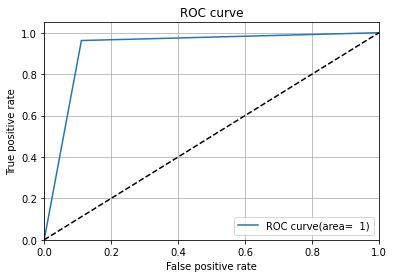

In [129]:
auc_score3 = roc_auc_score(y_test, tree_clf.predict(x_test))
print(auc_score3)
fpr,tpr,_=roc_curve(y_test,tree_clf.predict(x_test))
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [130]:
results_df_3 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score,train_score-test_score,auc_score3,confusion_matrix(y_test,tree_clf.predict(x_test))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Deviation','AUC','CM'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Deviation,AUC,CM
0,Logistic Regression,96.009390,95.804196,0.205194,0.962788,"[[85, 5], [1, 52]]"
1,Support Vector Machine,91.784038,91.608392,0.175646,0.933333,"[[78, 12], [0, 53]]"
2,Decision Tree Classifier,100.000000,91.608392,8.391608,0.925577,"[[80, 10], [2, 51]]"


Random Forest

In [131]:
rf_clf = RandomForestClassifier(n_estimators=8, random_state=437)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=8, random_state=437)

In [132]:
test_score = accuracy_score(y_test, rf_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(x_train)) * 100
print(test_score)
confusion_matrix(y_test,rf_clf.predict(x_test))

99.3006993006993


array([[90,  0],
       [ 1, 52]], dtype=int64)

0.9905660377358491


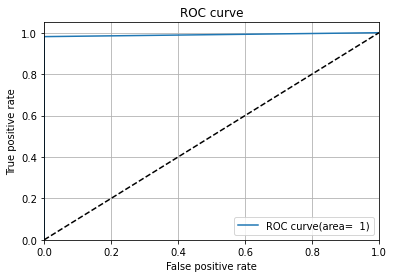

In [133]:
auc_score4 = roc_auc_score(y_test, rf_clf.predict(x_test))
print(auc_score4)
fpr,tpr,_=roc_curve(y_test,rf_clf.predict(x_test))
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [134]:
results_df_4 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score,train_score-test_score,auc_score4,confusion_matrix(y_test,rf_clf.predict(x_test))]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Deviation','AUC','CM'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Deviation,AUC,CM
0,Logistic Regression,96.009390,95.804196,0.205194,0.962788,"[[85, 5], [1, 52]]"
1,Support Vector Machine,91.784038,91.608392,0.175646,0.933333,"[[78, 12], [0, 53]]"
2,Decision Tree Classifier,100.000000,91.608392,8.391608,0.925577,"[[80, 10], [2, 51]]"
3,Random Forest Classifier,99.530516,99.300699,0.229817,0.990566,"[[90, 0], [1, 52]]"


KNN

In [135]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [136]:
test_score = accuracy_score(y_test, knn_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(x_train)) * 100
confusion_matrix(y_test,knn_clf.predict(x_test))

array([[85,  5],
       [ 4, 49]], dtype=int64)

0.9344863731656184


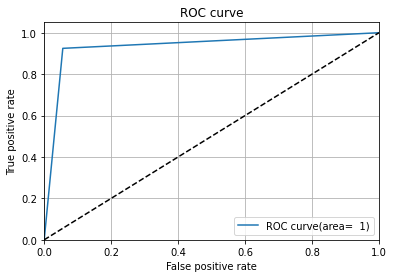

In [137]:
auc_score5 = roc_auc_score(y_test, knn_clf.predict(x_test))
print(auc_score5)
fpr,tpr,_=roc_curve(y_test,knn_clf.predict(x_test))
#calculate AUC
roc_auc=auc(fpr,tpr)

#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [138]:
results_df_5 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score,train_score-test_score,auc_score5,confusion_matrix(y_test,knn_clf.predict(x_test))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Deviation','AUC','CM'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Deviation,AUC,CM
0,Logistic Regression,96.009390,95.804196,0.205194,0.962788,"[[85, 5], [1, 52]]"
1,Support Vector Machine,91.784038,91.608392,0.175646,0.933333,"[[78, 12], [0, 53]]"
2,Decision Tree Classifier,100.000000,91.608392,8.391608,0.925577,"[[80, 10], [2, 51]]"
3,Random Forest Classifier,99.530516,99.300699,0.229817,0.990566,"[[90, 0], [1, 52]]"
4,K-nearest neighbors,94.131455,93.706294,0.425162,0.934486,"[[85, 5], [4, 49]]"


In [139]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [140]:
test_score = accuracy_score(y_test, knn_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(x_train)) * 100

0.9306079664570232


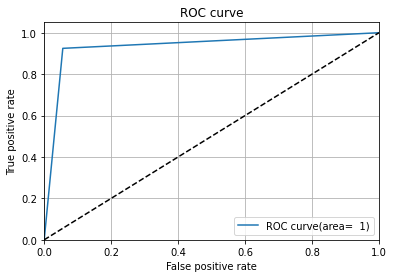

In [141]:
auc_score6 = roc_auc_score(y_test, nb_clf.predict(x_test))
print(auc_score6)
fpr,tpr,_=roc_curve(y_test,knn_clf.predict(x_test))
#calculate AUC
roc_auc=auc(fpr,tpr)

#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [142]:
results_df_6 = pd.DataFrame(data=[["Navie Bayes", train_score, test_score,train_score-test_score,auc_score6,confusion_matrix(y_test,nb_clf.predict(x_test))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Deviation','AUC','CM'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Deviation,AUC,CM
0,Logistic Regression,96.009390,95.804196,0.205194,0.962788,"[[85, 5], [1, 52]]"
1,Support Vector Machine,91.784038,91.608392,0.175646,0.933333,"[[78, 12], [0, 53]]"
2,Decision Tree Classifier,100.000000,91.608392,8.391608,0.925577,"[[80, 10], [2, 51]]"
3,Random Forest Classifier,99.530516,99.300699,0.229817,0.990566,"[[90, 0], [1, 52]]"
4,K-nearest neighbors,94.131455,93.706294,0.425162,0.934486,"[[85, 5], [4, 49]]"
5,Navie Bayes,94.131455,93.706294,0.425162,0.930608,"[[86, 4], [5, 48]]"


In [143]:
#for i in range(1,1000):
 # for j in range(1,1000):
  # rf_clf1 = RandomForestClassifier(n_estimators=i, random_state=j)
   #rf_clf1.fit(x_train, y_train)
   #test_score1 = accuracy_score(y_test, rf_clf1.predict(x_test)) * 100
   #train_score1 = accuracy_score(y_train, knn_clf.predict(x_train)) * 100
   #if(test_score1>99)&(train_score1>test_score1):
    # print('{},estimator{},state{}'.format(test_score1,i))

In [144]:
import pickle

pickle.dump(rf_clf, open("breast.pkl", "wb"))

model=pickle.load(open('breast.pkl','rb'))